In [ ]:
import numpy as np
import sympy as sy
from scipy.linalg import solve
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.dpi'] = 78
plt.rcParams['savefig.dpi'] = 300

In [2]:
def special_matrix(n):
    A=np.zeros((n,n))
    A+=np.diag(2*np.ones(n))
    A+=np.diag(-np.ones(n-1),-1)
    A+=np.diag(-np.ones(n-1),1)
    return A
print(np.linalg.cond(special_matrix(40)))
# print(special_matrix(10))
def b(n):
    a=1/(n**2)
    A=np.zeros((n,1))
    A+=a*np.ones((n,1))
    return A
def b_n_hat(n):
    a=1/((n+1)**2)
    A=np.zeros((n,1))
    A+=a*np.ones((n,1))
    return A
# print(b(3))
def x_n_hat(n):
    x_n=[i/(n+1) for i in range(1,n+1)]
    return x_n

680.6170700217226


Here is the value of y_n_hat against x_n: [0.025  0.0475 0.0675 0.085  0.1    0.1125 0.1225 0.13   0.135  0.1375
 0.1375 0.135  0.13   0.1225 0.1125 0.1    0.085  0.0675 0.0475 0.025 ]
Here is the value of y against x_n: [0.022675736961451247, 0.04308390022675737, 0.061224489795918366, 0.07709750566893424, 0.09070294784580499, 0.10204081632653061, 0.1111111111111111, 0.11791383219954649, 0.12244897959183673, 0.12471655328798185, 0.12471655328798187, 0.12244897959183673, 0.11791383219954649, 0.1111111111111111, 0.10204081632653061, 0.09070294784580502, 0.07709750566893425, 0.06122448979591838, 0.04308390022675734, 0.022675736961451254]
Here is the value of y_n_tilda against x_n: [0.02267574 0.0430839  0.06122449 0.07709751 0.09070295 0.10204082
 0.11111111 0.11791383 0.12244898 0.12471655 0.12471655 0.12244898
 0.11791383 0.11111111 0.10204082 0.09070295 0.07709751 0.06122449
 0.0430839  0.02267574]


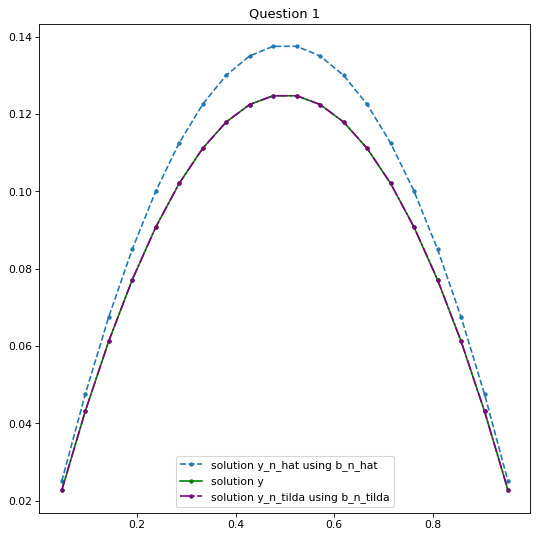

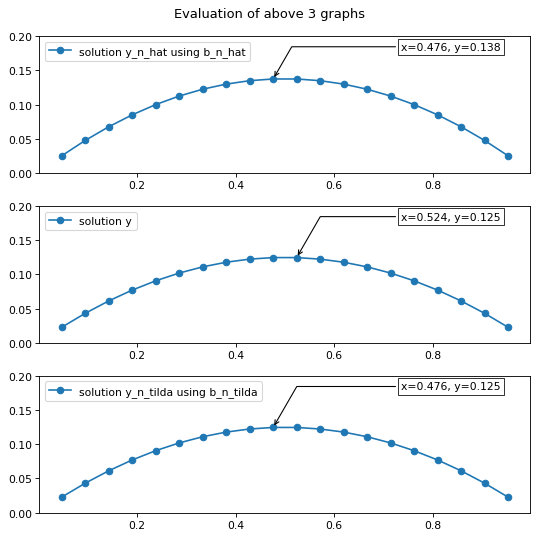

In [3]:
def solve_linear_sys(A,b,n):
    y_n=solve(A,b)
    return y_n
def reshape(y_n,n):
    return y_n.reshape(n)
y_n=reshape(solve_linear_sys(special_matrix(20),b(20),20),20) #convert into a 1-D array.
print(f'Here is the value of y_n_hat against x_n: {y_n}')
fig1=plt.figure()
plt.plot(x_n_hat(20),y_n,linestyle='--',label='solution y_n_hat using b_n_hat',marker='.')
y=[-(1/2)*(i**2)+(1/2)*i for i in x_n_hat(20)]
print(f'Here is the value of y against x_n: {y}')
plt.plot(x_n_hat(20),y,color='green',linestyle='-',label='solution y',marker='.')
y_n_hat=reshape(solve_linear_sys(special_matrix(20),b_n_hat(20),20),20)
print(f'Here is the value of y_n_tilda against x_n: {y_n_hat}')
plt.plot(x_n_hat(20),y_n_hat,linestyle='-.',color='purple',label='solution y_n_tilda using b_n_tilda',marker='.')
plt.legend()
plt.title('Question 1')
plt.savefig('Q1')
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = max(y)
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)
fig, (ax1,ax2,ax3) = plt.subplots(3)
ax1.set_ylim(0,0.2)
ax2.set_ylim(0,0.2)
ax3.set_ylim(0,0.2)
fig.suptitle('Evaluation of above 3 graphs')
ax1.plot(x_n_hat(20),y_n,label='solution y_n_hat using b_n_hat',marker='o')
ax1.legend(loc='upper left')
annot_max(x_n_hat(20),y_n,ax1)
ax2.plot(x_n_hat(20),y,label='solution y',marker='o')
ax2.legend(loc='upper left')
annot_max(x_n_hat(20),y,ax2)
ax3.plot(x_n_hat(20),y_n_hat,label='solution y_n_tilda using b_n_tilda',marker='o')
ax3.legend(loc='upper left')
annot_max(x_n_hat(20),y_n_hat,ax3)
plt.savefig("subplotQ1")

## Question 2 ##

en value when n=20 is [[-0.00232426]
 [-0.0044161 ]
 [-0.00627551]
 [-0.00790249]
 [-0.00929705]
 [-0.01045918]
 [-0.01138889]
 [-0.01208617]
 [-0.01255102]
 [-0.01278345]
 [-0.01278345]
 [-0.01255102]
 [-0.01208617]
 [-0.01138889]
 [-0.01045918]
 [-0.00929705]
 [-0.00790249]
 [-0.00627551]
 [-0.0044161 ]
 [-0.00232426]] en value when n=40 is [[-0.00060232]
 [-0.00117452]
 [-0.00171661]
 [-0.00222858]
 [-0.00271044]
 [-0.00316218]
 [-0.0035838 ]
 [-0.00397531]
 [-0.0043367 ]
 [-0.00466798]
 [-0.00496914]
 [-0.00524018]
 [-0.00548111]
 [-0.00569192]
 [-0.00587262]
 [-0.0060232 ]
 [-0.00614366]
 [-0.00623401]
 [-0.00629424]
 [-0.00632436]
 [-0.00632436]
 [-0.00629424]
 [-0.00623401]
 [-0.00614366]
 [-0.0060232 ]
 [-0.00587262]
 [-0.00569192]
 [-0.00548111]
 [-0.00524018]
 [-0.00496914]
 [-0.00466798]
 [-0.0043367 ]
 [-0.00397531]
 [-0.0035838 ]
 [-0.00316218]
 [-0.00271044]
 [-0.00222858]
 [-0.00171661]
 [-0.00117452]
 [-0.00060232]] en value when n=80 is [[-0.00015337]
 [-0.0003029 ]
 [

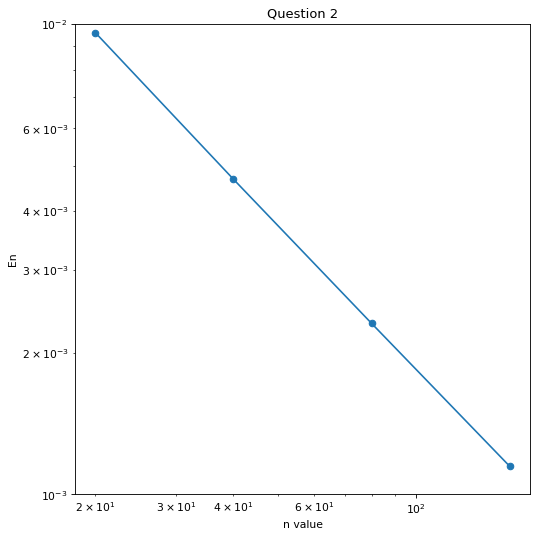

Here is En for different n: [0.00958797240336126, 0.004678819260754207, 0.0023107490859802598, 0.0011482260364562053]
The gradient of the plot is: -1.020959169786405


In [8]:
def solve_for_y(n):
    return np.array([[-(1/2)*(i**2)+(1/2)*i for i in x_n_hat(n)]])
n=[20,40,80,160]
value=[]
for i in n:
    front=solve_linear_sys(special_matrix(i),b(i),i)
    back=solve_for_y(i).reshape(i,1)
    en=back-front
    print(f'en value when n={i} is {en}',end=' ')
    En=i**(-1/2)*np.linalg.norm(en,2)
    value.append(En)
fig = plt.figure()
plt.plot(n,value,label='relative error',marker='o')
plt.ylim(10**(-3),10**(-2))
plt.xlabel('n value')
plt.ylabel('En')
plt.yscale('log')
plt.xscale('log')
plt.title('Question 2')
plt.savefig("Q2")
plt.show()
print(f'Here is En for different n: {value}')
grad = np.gradient(np.log10(value), np.log10(n))
print('The gradient of the plot is:', grad.mean())

## Conditional number ##

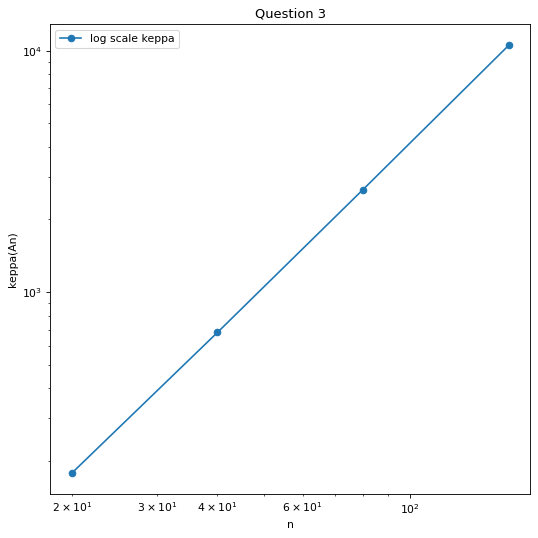

Here is the conditional number for different n: [178.06427461086017, 680.6170700217076, 2658.4065019157188, 10504.718944451404]
The gradient of the plot is: 1.960230060929547


In [5]:
values=[]
for i in n:
    keppa=np.linalg.norm(np.linalg.inv(special_matrix(i)),2)*np.linalg.norm(special_matrix(i),2)
    values.append(keppa)
fig = plt.figure()
plt.plot(n,values,marker='o',label='log scale keppa')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n')
plt.ylabel('keppa(An)')
plt.title('Question 3')
plt.savefig('Q3')
plt.show()
print(f'Here is the conditional number for different n: {values}' )
grad = np.gradient(np.log10(values), np.log10(n))
print('The gradient of the plot is:', grad.mean())